# Variable description

* media_id - identifiant of the song listened by the user
* album_id - identifiant of the album of the song
* media_duration - duration of the song
* user_gender -  gender of the user
* user_id -  anonymized id of the user
* context_type - type of content where the song was listened: playlist, album ...
* release_date - release date of the song with the format YYYYMMDD
* ts_listen - timestamp of the listening in UNIX time
* platform_name - type of os
* platform_family - type of device
* user_age - age of the user
* listen_type - if the songs was listened in a flow or not
* artist_id - identifiant of the artist of the song
* genre_id - identifiant of the genre of the song
* is_listened - 1 if the track was listened, 0 otherwise

# Exploratory Data Analysis

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from IPython.display import Markdown as md
import seaborn as sns
from mpl_toolkits import mplot3d
from statsmodels.graphics.mosaicplot import mosaic
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Import the full dataset and the sample dataset

It's important to note that:

* df : sample data with reduced rows
* df_full: the original data

In [67]:
# Sample file
from deezerData import readData
df, X, y, X_train, X_test, y_train, y_test = readData()

First, let's have a look at the data:

In [117]:
# Full dataset
df_full = pd.read_csv("../Data/train.csv")

In [118]:
df_full.head()

,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,user_gender,user_id,artist_id,user_age,is_listened
0,25471,1480597215,222606,41774,12,20040704,1,0,223,0,0,9241,55164,29,0
1,25571,1480544735,250467,43941,0,20060301,2,1,171,0,0,16547,55830,30,1
2,16,1479563953,305197,48078,1,20140714,2,1,149,1,1,7665,2704,29,1
3,7,1480152098,900502,71521,0,20001030,0,0,240,0,1,1580,938,30,0
4,7,1478368974,542335,71718,0,20080215,0,0,150,0,1,1812,2939,24,1


## Dimension

### The full dataset

In [70]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7558834 entries, 0 to 7558833
Data columns (total 15 columns):
 #   Column           Dtype
---  ------           -----
 0   genre_id         int64
 1   ts_listen        int64
 2   media_id         int64
 3   album_id         int64
 4   context_type     int64
 5   release_date     int64
 6   platform_name    int64
 7   platform_family  int64
 8   media_duration   int64
 9   listen_type      int64
 10  user_gender      int64
 11  user_id          int64
 12  artist_id        int64
 13  user_age         int64
 14  is_listened      int64
dtypes: int64(15)
memory usage: 865.0 MB


In [71]:
df_full.shape

(7558834, 15)

In [72]:
df_full.columns

Index(['genre_id', 'ts_listen', 'media_id', 'album_id', 'context_type',
       'release_date', 'platform_name', 'platform_family', 'media_duration',
       'listen_type', 'user_gender', 'user_id', 'artist_id', 'user_age',
       'is_listened'],
      dtype='object')

### The sample data

In [73]:
df.shape

(12923, 15)

## Check for multicollinearity
### Variance inflation factor
NOTE: VIF values above 10 indicates the presence of high multicolinearity. Usual approach would be to drop those variables. For values between 5-10 you should consider it as well.

In [74]:
df_new = df_full.drop(["is_listened"], axis=1)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(df_new.values, i) for i in range(df_new.shape[1])]
vif["features"] = df_new.columns
vif.round(2)

,VIF,features
0,1.02,genre_id
1,0.88,ts_listen
2,493.10,media_id
3,495.10,album_id
4,1.13,context_type
5,0.19,release_date
6,1.45,platform_name
7,1.36,platform_family
8,1.02,media_duration
9,1.09,listen_type


In the following example, "album_id" dropped, which drastically reduced VIF of media_id. "media_id" is one of the features which might be senseful to keep in the dataset.

In [75]:
df_new2 = df_full.drop(["is_listened", "album_id"], axis=1)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(df_new2.values, i) for i in range(df_new2.shape[1])]
vif["features"] = df_new2.columns
vif.round(2)

,VIF,features
0,1.01,genre_id
1,0.88,ts_listen
2,1.37,media_id
3,1.13,context_type
4,0.19,release_date
5,1.45,platform_name
6,1.36,platform_family
7,1.02,media_duration
8,1.08,listen_type
9,1.01,user_gender


## Dates

In [119]:
df_full_new = df_full

The two columns *ts_listen* and *release_date* are not in the right format. 

In [120]:
df_full_new["ts_listen"] = pd.to_datetime(df_full_new["ts_listen"], unit="s")
df_full_new["ts_listen"]

0         2016-12-01 13:00:15
1         2016-11-30 22:25:35
2         2016-11-19 13:59:13
3         2016-11-26 09:21:38
4         2016-11-05 18:02:54
                  ...        
7558829   2016-11-29 05:41:37
7558830   2016-11-24 07:44:25
7558831   2016-11-24 13:16:17
7558832   2016-11-23 21:35:18
7558833   2016-11-24 23:14:35
Name: ts_listen, Length: 7558834, dtype: datetime64[ns]

In [121]:
df_full_new["release_date"].max()

30000101

The *release_date* presents an unrealistic value with the year 3000. Hence, we eliminate all of the observations after the year 2022.

In [122]:
# Filter to choose release_date before 2022
df_full_new = df_full_new[df_full_new['release_date'] < 20220000]
# Change the column from int to datetime 
df_full_new["release_date"] = pd.to_datetime(df_full_new["release_date"], format="%Y%m%d")

In [123]:
df_full_new.shape

(7558817, 15)

In [ ]:
7558834 - 7558817

17 entries were removed with invalid *release_date*. Next, we examine the columns with ID. In fact, ID are numerical value assign to each entity, it can be consider as numerical variable. In this step, let's change id to categorical variables.

Next, we change these columns to categorical variables:

In [124]:
col = ["genre_id", 
        "media_id", 
        "album_id", 
        "context_type", 
        "platform_name", 
        "platform_family", 
        "listen_type", 
        "user_gender",
        "user_id", 
        "artist_id", 
        "is_listened"]

df_full_new[col] = df_full_new[col].astype("category")

In [125]:
df_full_new.dtypes

genre_id                 category
ts_listen          datetime64[ns]
media_id                 category
album_id                 category
context_type             category
release_date       datetime64[ns]
platform_name            category
platform_family          category
media_duration              int64
listen_type              category
user_gender              category
user_id                  category
artist_id                category
user_age                    int64
is_listened              category
dtype: object

## Missing values

In [84]:
df_full.isna().sum()

genre_id           0
ts_listen          0
media_id           0
album_id           0
context_type       0
release_date       0
platform_name      0
platform_family    0
media_duration     0
listen_type        0
user_gender        0
user_id            0
artist_id          0
user_age           0
is_listened        0
dtype: int64

## Unique values

Let's look at the number of unique values in each column:

In [61]:
print(df_full.apply(lambda col: col.nunique()))

genre_id              2922
ts_listen          2256229
media_id            452965
album_id            151464
context_type            74
release_date          8901
platform_name            3
platform_family          3
media_duration        1652
listen_type              2
user_gender              2
user_id              19918
artist_id            67135
user_age                13
is_listened              2
dtype: int64


There are 2922 unique values in *genre_id*, which we do not have the label of each *genre_id*.

## Descriptive statistics

In [130]:
# Describe the data
print('Dataset stats: \n', df_full.describe())

Dataset stats: 
            genre_id      media_id      album_id  context_type  release_date  \
count  7.558834e+06  7.558834e+06  7.558834e+06  7.558834e+06  7.558834e+06   
mean   2.245030e+03  7.839624e+07  8.136169e+06  2.360018e+00  2.011388e+07   
std    1.308979e+04  5.133633e+07  5.460090e+06  4.659856e+00  7.570138e+04   
min    0.000000e+00  2.000580e+05  1.976000e+03  0.000000e+00  1.900010e+07   
25%    0.000000e+00  1.376614e+07  1.255566e+06  0.000000e+00  2.009123e+07   
50%    3.000000e+00  9.380660e+07  9.525626e+06  1.000000e+00  2.014103e+07   
75%    2.700000e+01  1.262592e+08  1.329221e+07  2.000000e+00  2.016061e+07   
max    2.597310e+05  1.372601e+08  1.472086e+07  7.300000e+01  3.000010e+07   

       platform_name  platform_family  media_duration   listen_type  \
count   7.558834e+06     7.558834e+06    7.558834e+06  7.558834e+06   
mean    4.731900e-01     2.558086e-01    2.311527e+02  3.068742e-01   
std     7.353008e-01     5.481663e-01    7.999463e+01  4.6

In [91]:
df_full.shape

(7558834, 15)

## The response variable

In [17]:
# Count the number of observations per class
print('Observations per class: \n', df_full['is_listened'].value_counts())

Observations per class: 
 1    5170492
0    2388342
Name: is_listened, dtype: int64


<AxesSubplot:xlabel='is_listened', ylabel='count'>

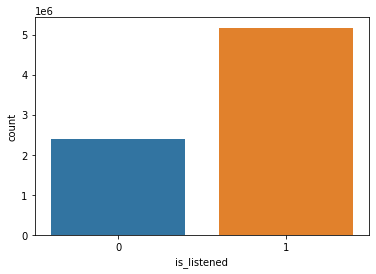

In [41]:
sns.countplot(x='is_listened', data=df_full)

## Gender

In [131]:
# Count the number of observations per class
print('Observations per class: \n', df_full['user_gender'].value_counts())

Observations per class: 
 0    4583009
1    2975825
Name: user_gender, dtype: int64


<AxesSubplot:xlabel='user_gender', ylabel='count'>

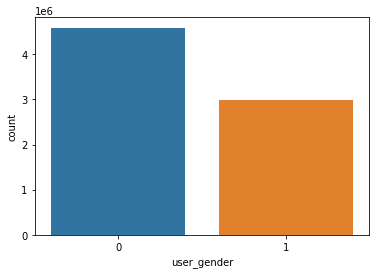

In [132]:
sns.countplot(x='user_gender', data=df_full)

<AxesSubplot:xlabel='user_gender', ylabel='count'>

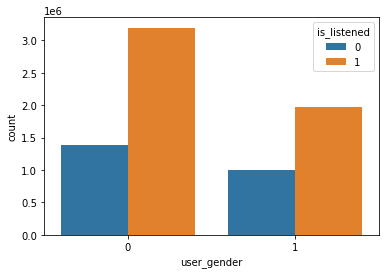

In [133]:
sns.countplot(x='user_gender', data=df_full, hue='is_listened')

In [112]:
df_stacked = df_full[["user_gender","is_listened"]]

## User age 

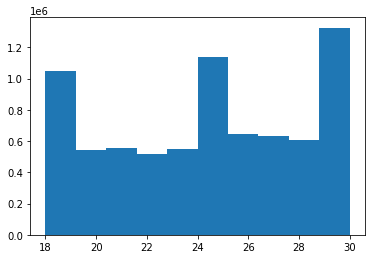

In [96]:
# Histogram of user's age
plt.hist(df_full["user_age"])
plt.show()

<AxesSubplot:xlabel='user_age', ylabel='count'>

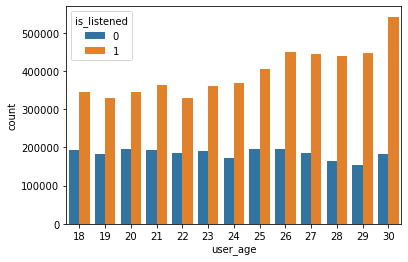

In [144]:
sns.countplot("user_age", data=df_full, hue='is_listened')

<AxesSubplot:xlabel='user_age', ylabel='count'>

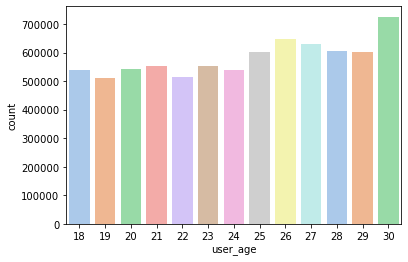

In [151]:
# Set the color palette
sns.countplot("user_age", data=df_full, palette='pastel')

In [136]:
age_bins = [10, 15, 20, 25, 30, 35]
df_full["user_age_bin"] = pd.cut(df_full["user_age"], age_bins)
df_full.head()

,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,user_gender,user_id,artist_id,user_age,is_listened,user_age_bin
0,25471,2016-12-01 13:00:15,222606,41774,12,20040704,1,0,223,0,0,9241,55164,29,0,"(25, 30]"
1,25571,2016-11-30 22:25:35,250467,43941,0,20060301,2,1,171,0,0,16547,55830,30,1,"(25, 30]"
2,16,2016-11-19 13:59:13,305197,48078,1,20140714,2,1,149,1,1,7665,2704,29,1,"(25, 30]"
3,7,2016-11-26 09:21:38,900502,71521,0,20001030,0,0,240,0,1,1580,938,30,0,"(25, 30]"
4,7,2016-11-05 18:02:54,542335,71718,0,20080215,0,0,150,0,1,1812,2939,24,1,"(20, 25]"


In [137]:
df_full["user_age_bin"].unique

<bound method Series.unique of 0          (25, 30]
1          (25, 30]
2          (25, 30]
3          (25, 30]
4          (20, 25]
             ...   
7558829    (20, 25]
7558830    (20, 25]
7558831    (25, 30]
7558832    (25, 30]
7558833    (25, 30]
Name: user_age_bin, Length: 7558834, dtype: category
Categories (5, interval[int64, right]): [(10, 15] < (15, 20] < (20, 25] < (25, 30] < (30, 35]]>

<AxesSubplot:xlabel='user_age_bin', ylabel='count'>

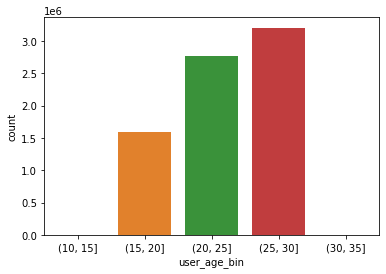

In [138]:
sns.countplot("user_age_bin", data=df_full)

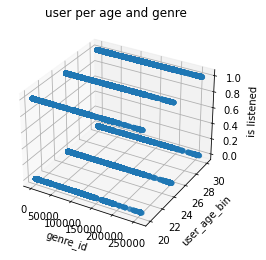

In [139]:
df_full["uab"] = df_full["user_age_bin"].astype(str)
df_full["uab"].replace({"(10, 15]":15, "(15, 20]":20 , "(20, 25]":25, 
                   "(25, 30]":30 , "(30, 35]":35}, inplace=True)

x = df_full["genre_id"]
y = df_full["uab"] 
z = df_full["is_listened"]

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z)    # plot the point (2,3,4) on the figure

# ax = plt.axes(projection="3d")
# ax.plot_surface(x,y,z, cmap ='viridis', edgecolor ='green')

# ax = fig.gca(projection = '3d')
# ax.bar3d(x,y,z)

ax.set_title("user per age and genre")
ax.set_xlabel("genre_id")
ax.set_ylabel("user_age_bin")
ax.set_zlabel("is listened")
# ax.set_xticks([100,125,150,175,200])
# ax.set_yticks([20,55,90,125,160])
# ax.set_zticks([5,15,25,35])
# ax.grid(False)

# scat_plot = ax.scatter(xs=x, ys=y, zs=z, c=df["is_listened"])
# cb = plt.colorbar(scat_plot, pad=0.2)
# cb.set_ticks([0,1])
# cb.set_ticklabels(["not listened", "listened"])

plt.show()

## Other plots

In this chapter, we make some plots for variables of interests. It's important to understand the dataset before applying machine learning techniques. Hence, this document is to explore the dataset. However, the data consists of 7558834 entries, which are excessively time-consuming to make visualizations. Therefore, we made some visualizations with the full dataset and some visualization with the subsample.

### Plots - the full dataset
Heatmap: Show correlations between features

<AxesSubplot:>

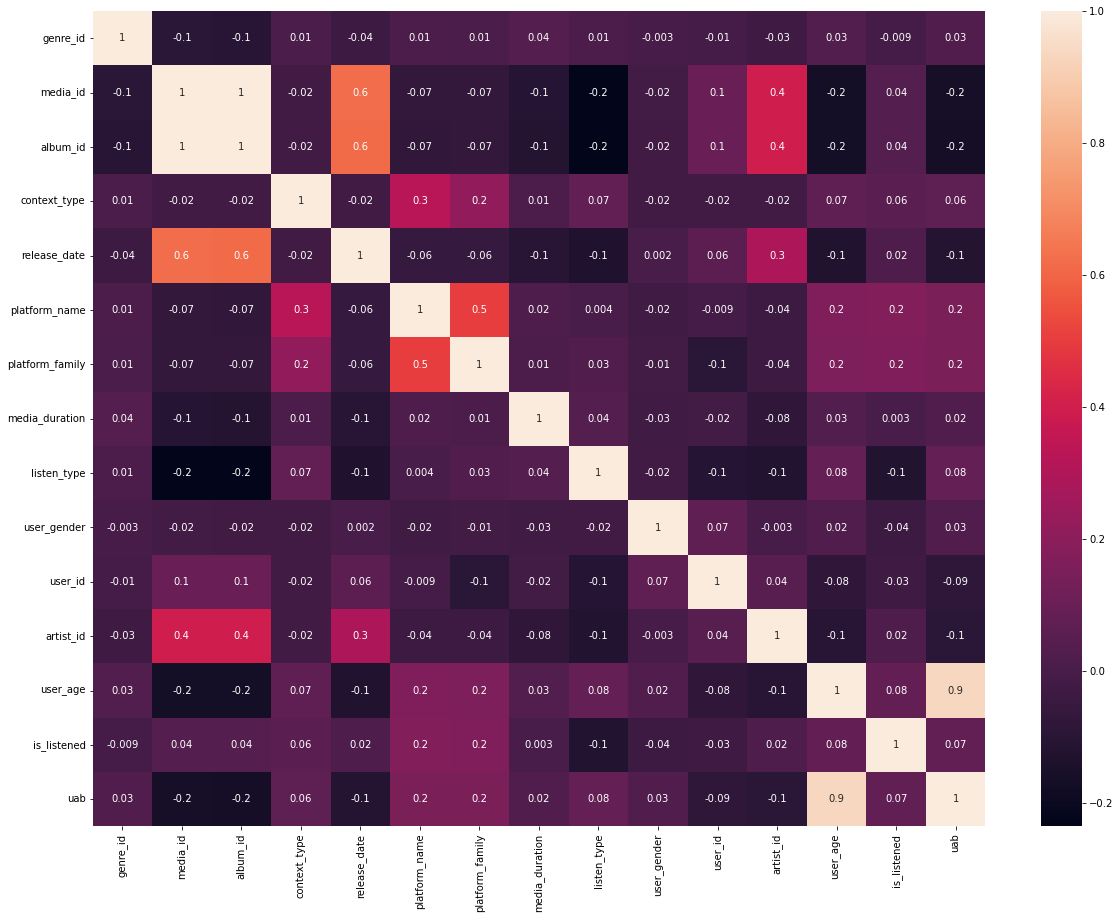

In [140]:
fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(df_full.corr(), annot=True, fmt=".1g")

In [ ]:
# Use pairplot and set the hue to be the class column
sns.pairplot(df_full, hue='is_listened') 
# Show the plot
plt.show()

MemoryError: Unable to allocate 28.8 MiB for an array with shape (7558834, 4) and data type bool

<AxesSubplot:xlabel='user_id', ylabel='media_id'>

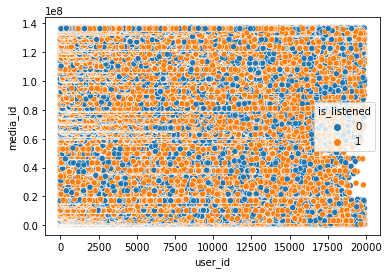

In [43]:
sns.scatterplot("user_id", "media_id", hue="is_listened", data=df_full)

<AxesSubplot:xlabel='user_id', ylabel='media_id'>

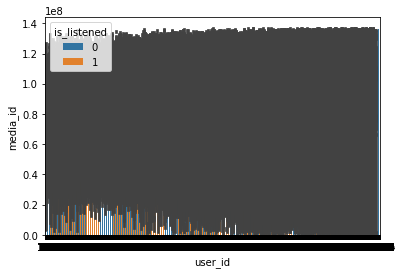

In [141]:
sns.barplot("user_id", "media_id", hue="is_listened", data=df_full)

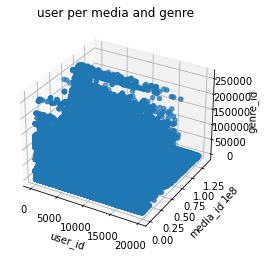

In [142]:
x = df_full["user_id"]
y = df_full["media_id"]
z = df_full["genre_id"]
# z = df["is_listened"]

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z)    # plot the point (2,3,4) on the figure

ax.set_title("user per media and genre")
ax.set_xlabel("user_id")
ax.set_ylabel("media_id")
ax.set_zlabel("genre_id")
# ax.set_xticks([100,125,150,175,200])
# ax.set_yticks([20,55,90,125,160])
# ax.set_zticks([5,15,25,35])
# ax.grid(False)

# scat_plot = ax.scatter(xs=x, ys=y, zs=z, c=df["is_listened"])
# cb = plt.colorbar(scat_plot, pad=0.2)
# cb.set_ticks([0,1])
# cb.set_ticklabels(["not listened", "listened"])


# "user_id", "media_id", hue="is_listened"

plt.show()

In [ ]:
x = df_full["user_id"]
y = df_full["media_id"]
# z = df["genre_id"]
z = df_full["is_listened"]

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z)    # plot the point (2,3,4) on the figure

ax.set_title("user per media and genre")
ax.set_xlabel("user_id")
ax.set_ylabel("media_id")
ax.set_zlabel("is_listened")
# ax.set_xticks([100,125,150,175,200])
# ax.set_yticks([20,55,90,125,160])
ax.set_zticks([0,1])
# ax.grid(False)

scat_plot = ax.scatter(xs=x, ys=y, zs=z, c=df["genre_id"])
cb = plt.colorbar(scat_plot, pad=0.2)
cb.set_ticks([0,1])
cb.set_ticklabels(["genre"])


# "user_id", "media_id", hue="is_listened"

plt.show()

<AxesSubplot:xlabel='user_age', ylabel='media_duration'>

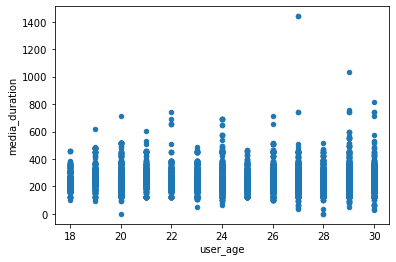

In [23]:
df_full.plot.scatter(x ="user_age", y="media_duration")

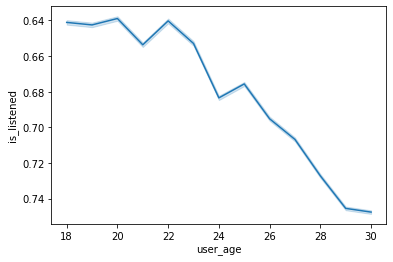

In [38]:
sns.lineplot(x="user_age", y="is_listened", data=df_full)
plt.show()

In [ ]:
# Histogram of is_listened
plt.hist(df_full["user_id"])
plt.show()

### Plot for the subsample

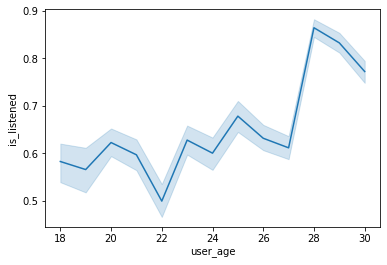

In [39]:
sns.lineplot(x="user_age", y="is_listened", data=df)
plt.show()

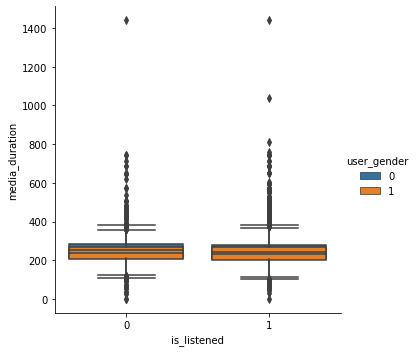

In [25]:
sns.catplot(x="is_listened", y="media_duration", hue="user_gender",
            kind="box", dodge=False, data=df)

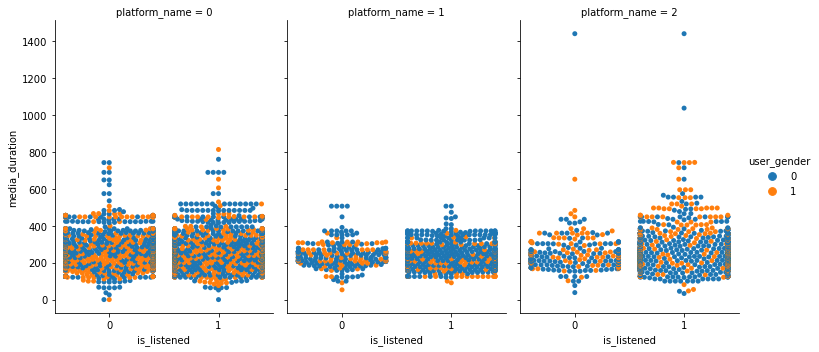

In [42]:
sns.catplot(x="is_listened", y="media_duration", hue="user_gender",
            col="platform_name", aspect=.7,
            kind="swarm", data=df)

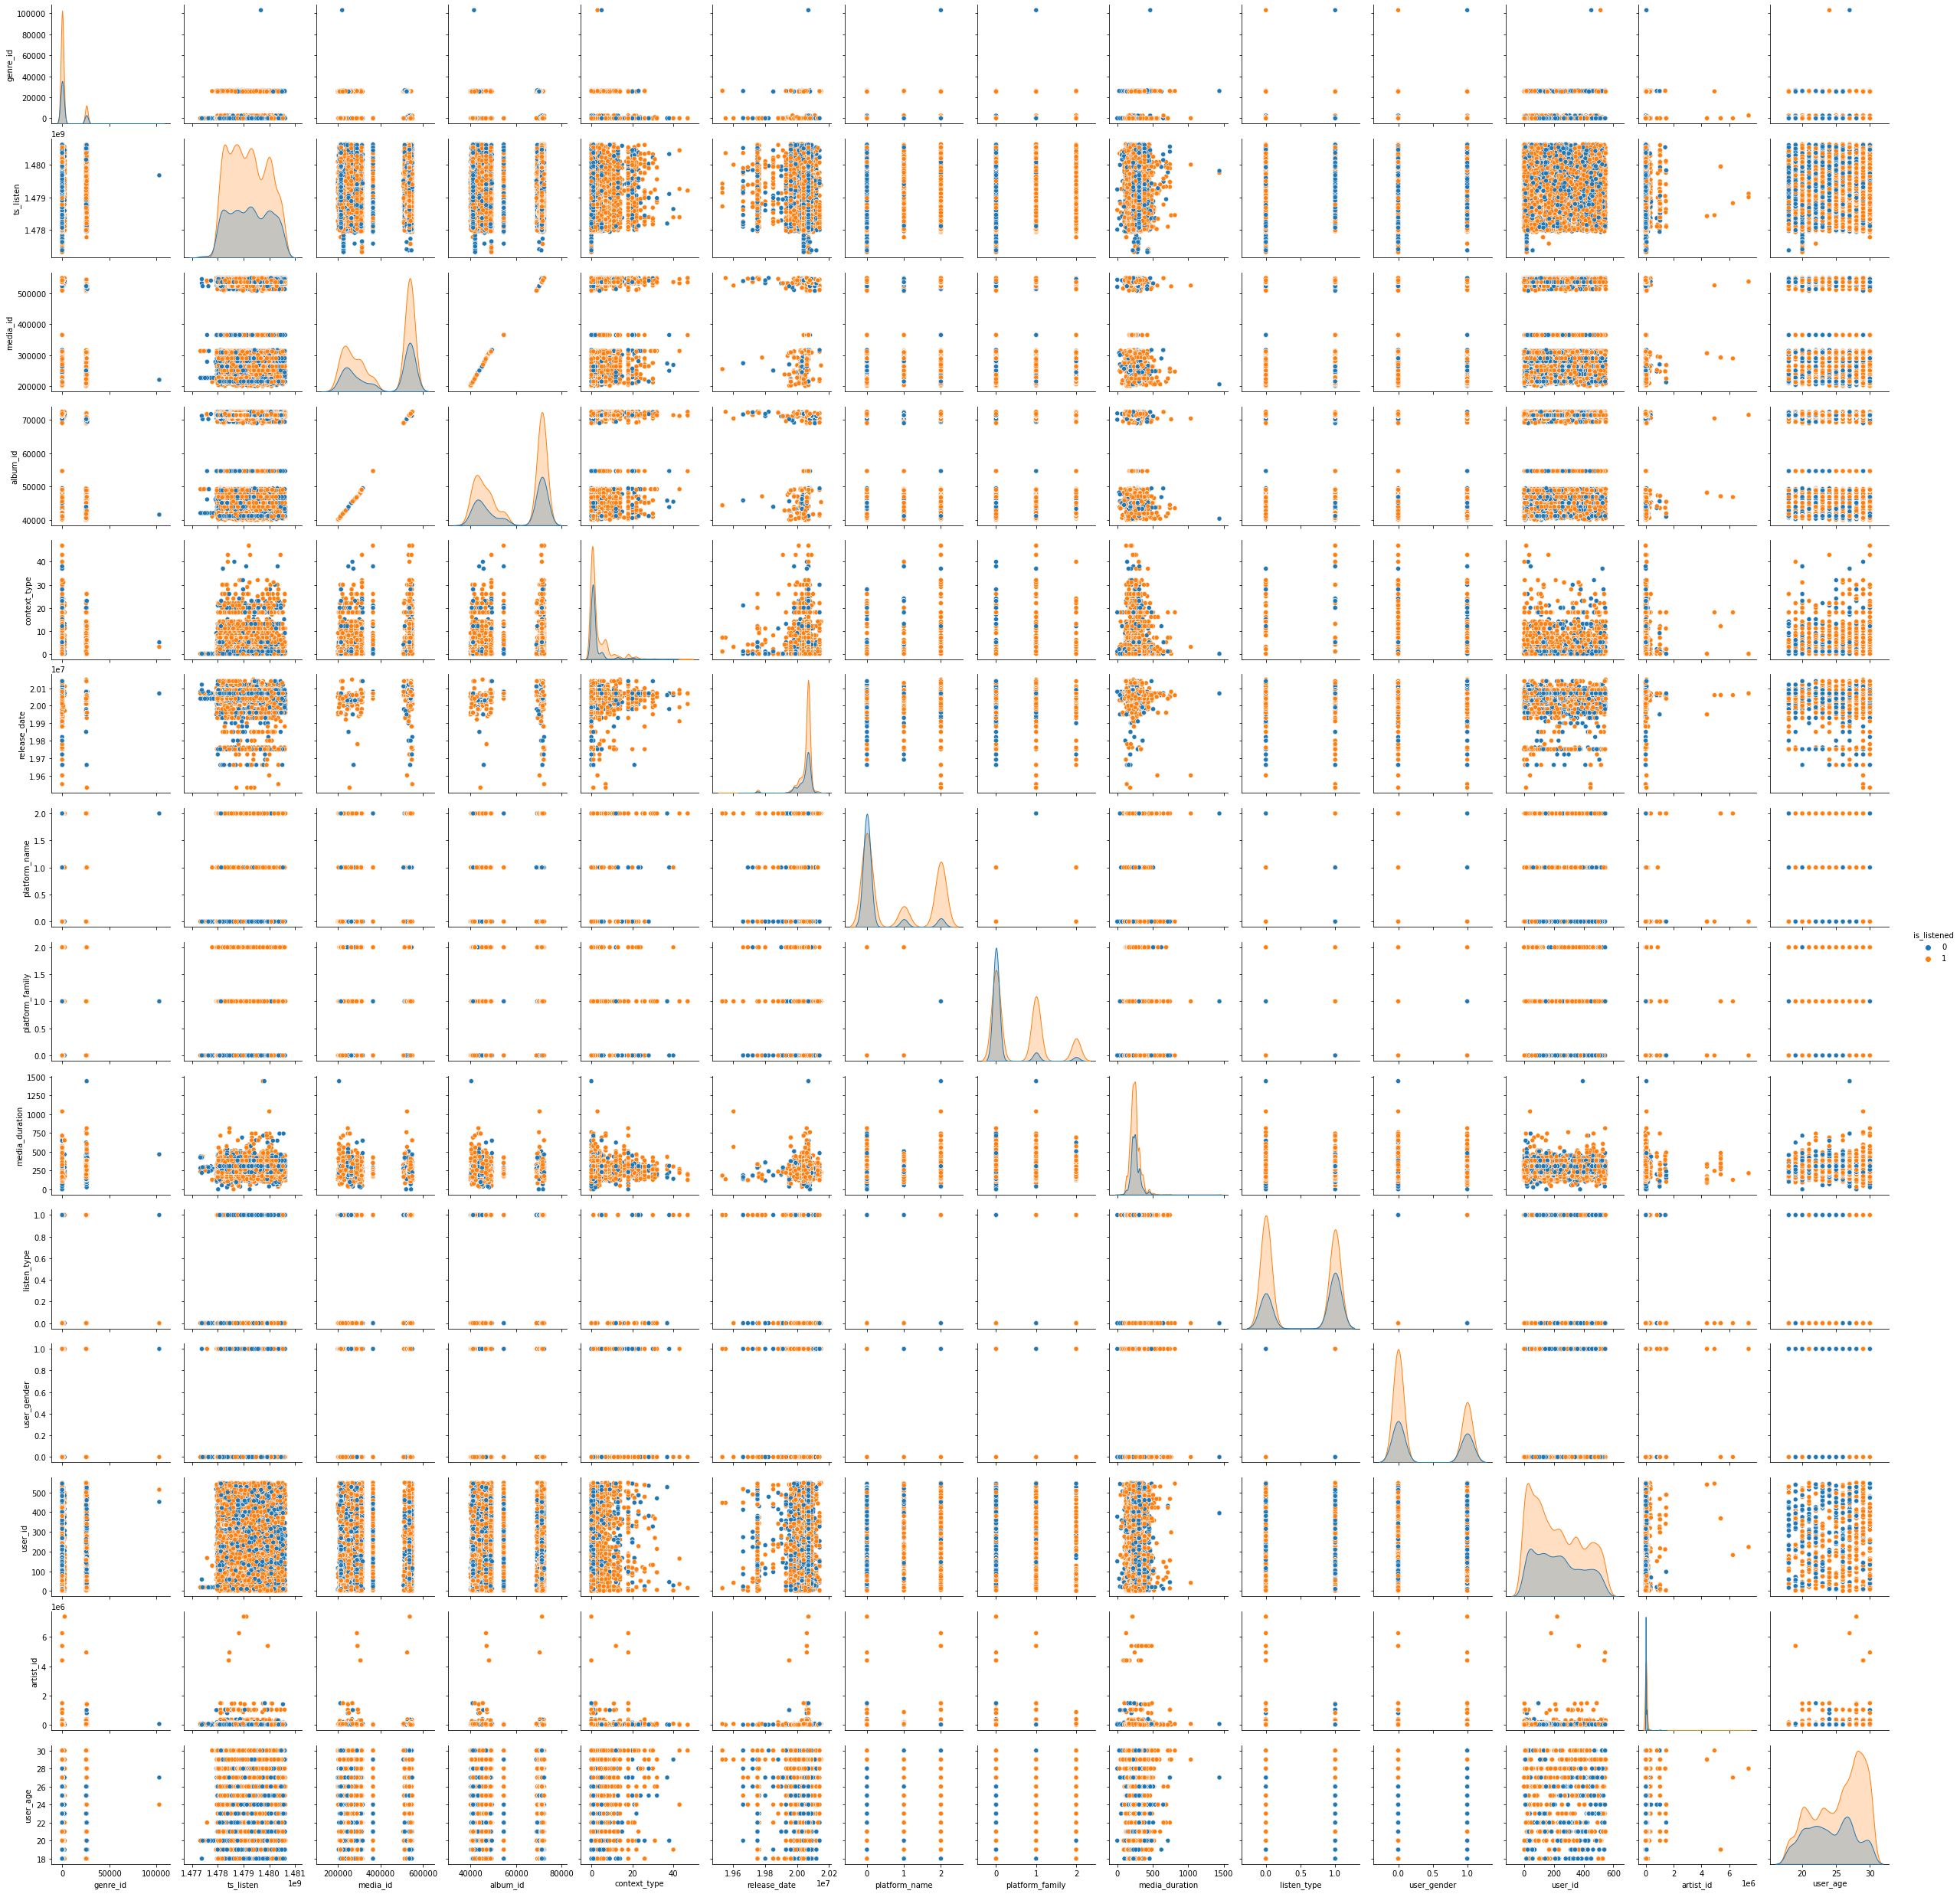

In [44]:
# Use pairplot and set the hue to be the class column
sns.pairplot(df, hue='is_listened') 
# Show the plot
plt.show()

(<Figure size 432x288 with 3 Axes>,
 {('1', '7'): (0.0, 0.0, 0.6703309268098877, 0.26824312833961356),
  ('1', '3'): (0.0,
   0.27084053093701616,
   0.6703309268098877,
   0.10561457839197329),
  ('1', '25551'): (0.0,
   0.379052511926392,
   0.6703309268098877,
   0.007428822039435442),
  ('1', '10'): (0.0,
   0.38907873656323005,
   0.6703309268098877,
   0.03061032695767357),
  ('1', '13'): (0.0,
   0.4222864661183062,
   0.6703309268098877,
   0.005907256079551045),
  ('1', '25781'): (0.0,
   0.43079112479525994,
   0.6703309268098877,
   0.004833209519632744),
  ('1', '9'): (0.0,
   0.4382217369122952,
   0.6703309268098877,
   0.022823489398265392),
  ('1', '297'): (0.0,
   0.4636426289079632,
   0.6703309268098877,
   0.0005370232799591938),
  ('1', '25471'): (0.0,
   0.46677705478532494,
   0.6703309268098877,
   0.023092001038244988),
  ('1', '26011'): (0.0,
   0.4924664584209726,
   0.6703309268098877,
   0.013873101398945637),
  ('1', '16'): (0.0,
   0.5089369624173208,
   

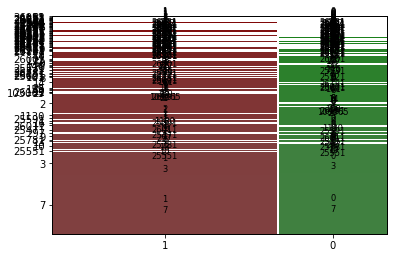

In [38]:
mosaic(df, ["is_listened", "genre_id"])